<a href="https://colab.research.google.com/github/khbae/data-analytics-process/blob/main/1_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5(Reinforcement_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강화학습(Reinforcement Learning)

## [배경훈 (성균관대학교)](https://biz.skku.edu/bizskk/intro/faculty.do?mode=view&perId=LZStrK4YQ4gQgZgFgggGTAUQIwAYBSBHAngFhhgFliAjAcwF4qg%20&srProfessorType=20)



Google DeepMind's: Deep Q-Learning
* https://www.youtube.com/watch?v=V1eYniJ0Rnk

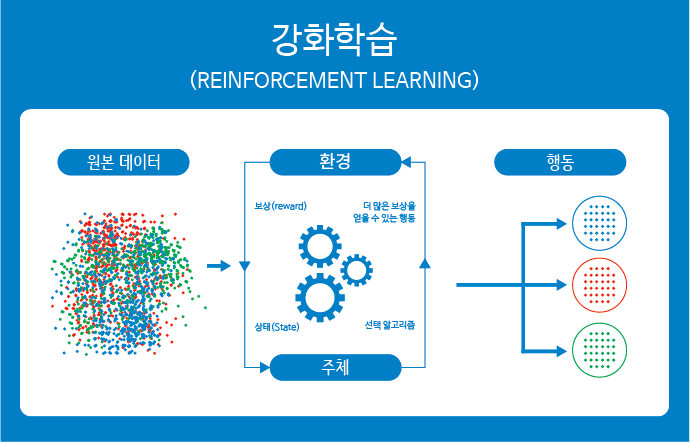

# 강화학습의 종류

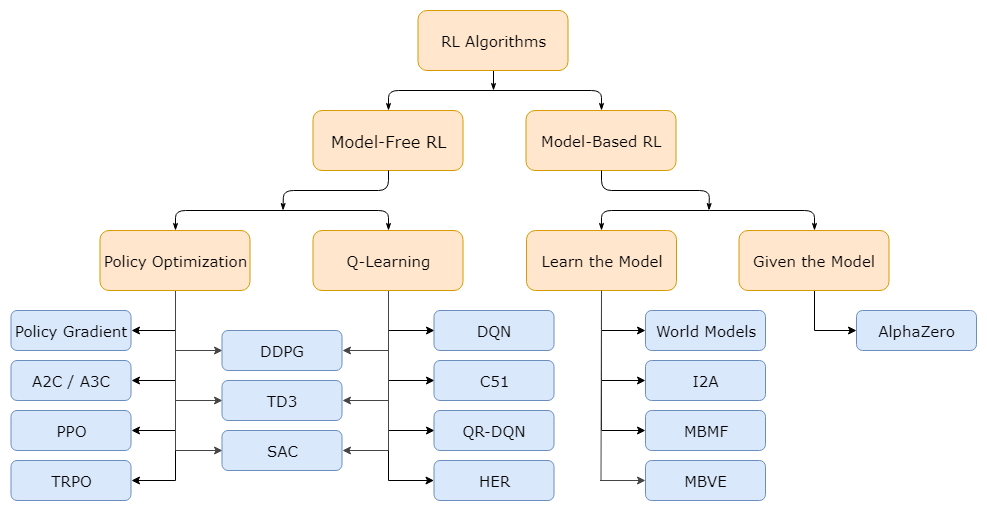

# 1. Q - Learning (https://en.wikipedia.org/wiki/Q-learning)

#### Q-Learning은 Model이 없이(Model-Free) 학습하는 강화학습 알고리즘

##### 1) Model-Based Algorithm : 환경에 대해 알고 있으며, 우리의 행동에 따른 환경의 변화를 아는 알고리즘
##### 예) 격자 공간 속의 로봇이 상하좌우로 이동을 할 때, 우리는 로봇의 다음 상태에 대해 직관적으로 파악할 수 있다.

##### 2) Model-Free Algorithm : 환경(Environment)에 대해 알지 못하고, 환경이 알려주는 다음 상태(State)와 다음 보상(Reward)을 '수동적으로' 얻게 된다. 
##### 예) 지뢰찾기를 한다고 할 때, 우리는 더 이상 환경에대해 모르므로 특정 네모칸을 클릭하면 환경이 주는 다음 상태와 다음 보상을 단순히 받는다.

##### >>> Model-Free Algorithm은 더 이상 환경이 어떻게 동작하는지 모르기 때문에 탐사(Exploration)를 해야한다. 이러한 탐사를 바탕으로 하는 Trail and Error를 통해 Policy Function을 점차 학습

##### 정책(Policy)이란 주어진 상태(State)에서 어떤 행동(Action)을 수행할지 나타내는 규칙

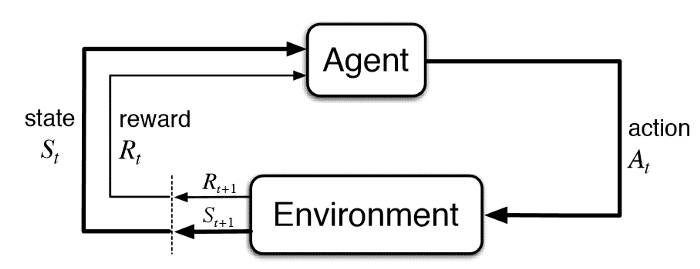

* Model/Environment : models of dynamics and reward
* Policy: Function mapping agent's states to actions
* Value function: future reward from being in a state and/or action when following a particular policy

### Goal : 의사결정자가 특정 상황에서 특정 행동을 하라는 최적의 Policy를 배우는 것

##### 의사결정자(Agent)가 주어진 상태(State)에서 주어진 행동(Action)을 수행하는 것이 가져다 줄 효용(Reward)의 기대값을 예측하는 함수인 행동 가치 함수(Q 함수)를 학습함으로써 최적의 정책(Policy)을 학습
##### Q 러닝의 장점 중 하나는 주어진 환경의 모델 없이도 수행하는 행동의 기대값을 비교할 수 있다는 점
##### "Q"라는 단어는 현재 상태에서 취한 행동의 보상에 대한 quality

* Deterministic Policy
$$ \pi(s) = a $$

* Stochastic Policy
$$ \pi(a|s) = Pr(a_t = a | S_t = s) $$

* Value Function
$$ V^{\pi}(s_t = s) = E_{\pi}[R_{t} + {\gamma} R_{t+1} + {\gamma}^2 R_{t+2} + {\gamma}^3 R_{t+3} +  ...|S_{t} = s] $$

* State-action value of a policy

$$ Q^{\pi}(s,a) = R(s,a) + \gamma \sum_{s' \in S} P(s'|s,a) V^{\pi}(s') $$

* Take action $a$, then follow the policy $\pi$.

$$ V^{\pi}(s) = Q^{\pi}(s, \pi(s))$$ 

### 행동 가치 함수(Q value, Q 함수)

##### 어떤 상태 s에서 어떤 행동 a를 했을 때, 그 행동이 가지는 Value를 계산하는 함수
##### 이러한 행동 가치 함수는 Discounted Factor를 사용하여 특정 행동을 취했을 때, Episode가 종료되기까지 보상의 총합의 예측값을 계산
##### $\gamma$ 는 0에서 1 사이의 값을 갖는 Discount Factor로 현재 얻는 보상이 미래에 얻는 보상보다 얼마나 더 중요한지를 의미하는 값


$Q_{\pi}(s,a) = R(s,a) + E_{\pi}[R_{t+1} + {\gamma}R_{t+2} + {\gamma}^2R_{t+3} +  ...|S_{t} = s, A_{t} = a] $

$Q^*(s_{t},a_{t}) = E[R_{t+1} + {\gamma} \hspace {1mm} max_{a_{t+1}}Q^*(S_{t+1},a_{t+1})|S_{t} = s_{t}, A_{t} = a_{t}] $

### Q-Learning Algorithm

##### 알고리즘이 시작되기 전에 Q 함수는 고정된 임의의 값을 갖는다. 
##### 각 시간 $t$에 에이전트는 어떠한 상태 $s_{t}$에서 행동 $a_{t}$를 취하고 새로운 상태 $s_{t+1}$로 전이한다. 이 때 보상 $r_{t}$가 얻어지며, Q 함수가 갱신된다. 
##### 알고리즘의 핵심은 다음과 같이 이전의 값과 새 정보의 가중합(weighted sum)을 이용하는 간단한 값 반복법(Value Iteration Update)이다.


$Q(s_{t},a_{t}) {\leftarrow} (1-{\alpha}) \cdot \underbrace{Q(s_{t},a_{t})}_{old \hspace{1mm} value} + \underbrace{{\alpha}}_{learning \hspace{1mm} rate} \cdot \overbrace{\Bigg(\underbrace{r_{t}}_{reward} + \underbrace{{\gamma}}_{discount \hspace{1mm} factor} \cdot \underbrace{\max_{a}Q(s_{t+1},a)}_{estimate \hspace{1mm} of \hspace{1mm} optimal \hspace{1mm} future \hspace{1mm} value}\Bigg)}^{learned \hspace{1mm} value}$


##### $\alpha$ 는 학습 속도 인자로, 0보다 크고 1보다 작거나 같은 값을 가진다.
도달한 상태 $s_{t+1}$이 종결 상태일 경우 알고리즘의 에피소드 하나가 끝난다. 

# 2. Q - Learning 예제 (Frozen Lake Game)

### State를 이동하여 H(Hall)에 빠지지 않고 G(Goal)로 이동하는 문제

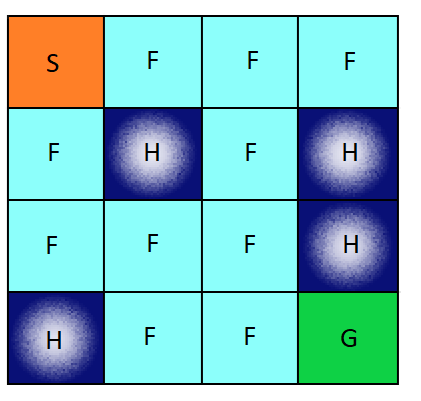

##### S : 시작점
##### G : 목표
##### F : 얼음길(agent가 서있을 수 있는 곳)
##### H : 구멍(agent가 도달하면 떨어지는 곳)

### 환경 세팅

In [ ]:
## 필요한 패키지를 불러오기
import gym
import numpy as np   ## Q-table 저장하기 위해 사용하는 패키지
import pickle    ## Q-table을 "pkl" 파일로 저장하기 위해 사용하는 패키지
import time, os
from tqdm import tqdm

env = gym.make('FrozenLake-v0', is_slippery=False)  ## FrozenLake game을 로드
env.reset()   ## 게임의 환경을 디폴트나 초기 상태로 리셋할 수 있다.
env.render()  ## 게임의 GUI를 보기


SFFF
FHFH
FFFH
HFFG


##### Agent의 가능한 4가지 움직임  : left(0), down(1), right(2), up(3)

##### 보상(reward) : F(얼음길) = 0 , H(구멍) = 0 , G(목표) = +1

##### 상태(States) : S, H, F, G 

#### >> 4x4=16 states & 4 actions

In [ ]:
total_episodes = 100000 ## 에피소드의 총수

lr_rate = 1  ## 학습속도인자(the learning rate)
gamma = 0.99  ## 할인인자(the discount factor)

## Q-table의 초기값을 16x4 영행렬로 설정
Q = np.zeros((env.observation_space.n, env.action_space.n))  ## (게임에서 상태의 총수 , 행동의 총수)

### Action $A_{t}$

$$
A_{t}= \begin{cases}  max_{a_{t}}Q^*(S_{t},a_{t}), & with \hspace{2mm} probability \hspace{2mm} 1 - \epsilon \\ random \hspace{2mm} action \hspace{2mm} a_{t}, & with \hspace{2mm} probability \hspace{2mm} \epsilon  \end{cases}
$$

In [ ]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
## 랜덤하게 0에서 1 사이의 숫자를 생성
## 생성한 숫자가 epsilon보다 작으면, env.action_space.sample()에서 랜덤으로 행동을 한다 
## 생성한 숫자가 epsilon보다 크면, 그 상태에서, Q-table에서 최대 value를 가지는 행동을 한다.
epsilon = 0.5    ## the epsilon-greedy approach : epsilon이라는 hyper-parameter를 통해 행동 결정
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action


## Q-Learning Algorithm을 이용하여 Q-table을 업데이트
def learn(state, state2, reward, action):
    predict = Q[state, action]
    target = reward + gamma * np.max(Q[state2, :])
    Q[state, action] = Q[state, action] + lr_rate * (target - predict)

$Q^*(s_{t},a_{t}) {\leftarrow} \underbrace{Q^*(s_{t},a_{t})}_{old \hspace{1mm} value} + \underbrace{{\alpha}}_{learning \hspace{1mm} rate} \cdot \overbrace{\Bigg(\underbrace{r_{t}}_{reward} + \underbrace{{\gamma}}_{discount \hspace{1mm} factor} \cdot \underbrace{\max_{a_{t+1}}Q^*(s_{t+1},a)}_{estimate \hspace{1mm} of \hspace{1mm} optimal \hspace{1mm} future \hspace{1mm} value}}^{learned \hspace{1mm} value} - \underbrace{Q^*(s_{t},a_{t})}_{old \hspace{1mm} value}\Bigg)$

In [ ]:
# 에피소드를 작동하기 시작
for episode in tqdm(range(total_episodes)):

    ## env.reset()을 사용하여 초기 상태를 state에 저장
    state = env.reset()    
    done = False
    
    ## 아래에서 반환받은 done을 통해 에피소드가 끝났는지 체크
    while not done:
               
        ## 적절한 행동이 선택된다. (epsilon-greedy approach)
        action = choose_action(state)  

        ## 해당 action을 했을 때 environment가 변하고, 새로운 state2, reward, done 여부, info를 반환 받음
        state2, reward, done, info = env.step(action)  ## 선택된 행동이 환경 내에서 수행되고, 다음 상태(state2)와 보상(reward)이 반환, 에피소드가 끝났다면 done = true, info는 디버깅에 사용되는 추가 정보를 저장

        ## 위의 정보를 이용하여 함수 learn(state, state2, reward, action)을 통해 Q-table을 업데이트  
        learn(state, state2, reward, action)  ## Q-Learning Algorithm
        
        ## Q-table을 업데이트하고 난 후, 이전 상태였던 state를 현재 상태인 state2로 설정                        
        state = state2

print(Q)

## Q-table을 "frozenlake_qTable.pkl"이라는 이름의 파일로 저장
with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)

100%|██████████| 100000/100000 [00:31<00:00, 3138.60it/s]

[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


In [ ]:
Q

array([[0.94148015, 0.95099005, 0.95099005, 0.94148015],
       [0.94148015, 0.        , 0.96059601, 0.95099005],
       [0.95099005, 0.970299  , 0.95099005, 0.96059601],
       [0.96059601, 0.        , 0.95099005, 0.95099005],
       [0.95099005, 0.96059601, 0.        , 0.94148015],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9801    , 0.        , 0.96059601],
       [0.        , 0.        , 0.        , 0.        ],
       [0.96059601, 0.        , 0.970299  , 0.95099005],
       [0.96059601, 0.9801    , 0.9801    , 0.        ],
       [0.970299  , 0.99      , 0.        , 0.970299  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9801    , 0.99      , 0.970299  ],
       [0.9801    , 0.99      , 1.        , 0.9801    ],
       [0.        , 0.        , 0.        , 0.        ]])

### training을 하고난 후 아래의 코드를 이용하여 게임을 할 수 있다

In [ ]:
import gym
import numpy as np
import pickle
import time, os

env = gym.make('FrozenLake-v0', is_slippery=True)

## Q-table을 로드할 수 있다.
with open("frozenLake_qTable.pkl", 'rb') as f:   
	Q = pickle.load(f)

def choose_action(state):
	action = np.argmax(Q[state, :])
	return action

# start
for episode in range(5):

	state = env.reset()
	print("*** Episode: ", episode)
	t = 0
	while t < 100:
		env.render()

		action = choose_action(state)  
		
		state2, reward, done, info = env.step(action)  
		
		state = state2

		if done:
			break

		time.sleep(0.5)
		os.system('clear')

*** Episode:  0

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
*** Episode:  1

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
*** Episode:  2

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
*** Episode:  3

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
*** Episode:  4

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
H

# Reinforcement Learning in Finance

* “learning what to do, how to map situations to actions, so as to maximize a numerical reward signal”

* combine the “prediction” and the “portfolio construction” task in one integrated step
    * important constraints, such as transaction costs, market liquidity, and the investor’s degree of risk-aversion, can be conveniently taken into account.

* the “trading agent” learns by interacting with the environment (or a model thereof),
    * incorporate the aforementioned constraints, such as liquidity and transaction costs, into its decision making process.

* 3 types of approach
    * Critic-only approach
    * Actor-only approach
    * Actor-critic approach

* The works of Kearns and Nevmyvaka (2013) : High Frequency Trading(HFT)에서 강화학습의 적용에 대한 세 가지 사례 연구를 제공

    * trade execution(거래 체결)을 최적화 
    * order book의 state로부터의 단기적인 가격 움직임에 대한 예측 
    * 다크풀에 대한 거래의 배분을 최적화

* 전반적으로, 세 연구 모두 agent의 policies을 해석하는 방법뿐만 아니라 state에 대한 관련 변수에 초점을 맞춘 귀중한 통찰력을 제공한다.

* Nevmyvaka et al. (2006) : trade execution(거래 체결)을 최적화

    * 저자들은 미리 정의된 시간 H에서 특정 수의 주식 V를 매입하는 데 소비되는 자본의 양을 최소화하는 것을 목표로 한다. (유사적으로, 저자들은 특정 수의 주식을 매도하기 위해 받은 수익을 극대화하는 것을 목표로 한다.)

    * agent에게 환경에 대한 포괄적인 시각을 제공하기 위해, state(상태)는 개인적인 변수(아직 체결되어야 하는 주식 수, 경과 시간)와 order book의 현재 상태를 설명하는 여러 시장 변수(예: 현재 bid-ask 스프레드)로 구성된다.

    * 매번 time step t에서 agent는 새로운 제한 가격을 설정하고, 체결된 주식들을 관찰하며, order book의 새로운 state(상태)를 감지한다. 모든 주식들이 체결되거나 시간 H가 경과하면, agent는 주문의 총 수익으로 보상을 받는다.
